In [1]:
from unityagents import UnityEnvironment
import torch
from ddpg_agent import Agent
import numpy as np
from collections import deque
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Configuration
env_path = 'D:/20_agents/Reacher.exe'
actor_model = 'actor.pth'
critic_model = 'model.pth'
random_seed = 64
num_episodes = 160
max_num_timesteps = 1500

In [3]:
#Start enviroment
env = UnityEnvironment(file_name=env_path)
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
#Start agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=random_seed)

In [5]:
#Train model
def train():
    scores_deque = deque(maxlen=100)
    scores_global = []
    t0 =  time.time()
    for i_episode in range(1, num_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]   
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        agent.reset()
        score_average = 0

        for timestep in range(max_num_timesteps):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            agent.step(states, actions, rewards, next_states, dones, timestep)
            states = next_states
            scores += rewards    
            if np.any(dones):
                break

        score = np.mean(scores)
        scores_deque.append(score)
        score_average = np.mean(scores_deque)
        scores_global.append(score)
        t1 = (time.time()-t0)/60.
        print(f'Episode: {i_episode}\tTime(Min): {round(t1,2)}\tScore: {round(score,2)}\tMax: {round(np.max(scores),2)}\tMin: {round(np.min(scores),2)}\tAvg queue: {round(np.mean(scores_deque),2)}')

        if len(scores_deque) == 100 and np.mean(scores_deque) >= 30:  
            print('Completed!')
            env.close()
            torch.save(agent.actor_local.state_dict(), actor_model)
            torch.save(agent.critic_local.state_dict(), critic_model)
            break
            
    return scores_global

In [6]:
results = train()

Episode: 1	Time(Min): 0.42	Score: 0.13	Max: 0.9	Min: 0.0	Avg queue: 0.13
Episode: 2	Time(Min): 0.87	Score: 0.21	Max: 0.64	Min: 0.0	Avg queue: 0.17
Episode: 3	Time(Min): 1.31	Score: 0.16	Max: 1.41	Min: 0.0	Avg queue: 0.17
Episode: 4	Time(Min): 1.76	Score: 0.77	Max: 1.66	Min: 0.2	Avg queue: 0.32
Episode: 5	Time(Min): 2.2	Score: 0.8	Max: 1.47	Min: 0.0	Avg queue: 0.42
Episode: 6	Time(Min): 2.66	Score: 0.7	Max: 1.46	Min: 0.15	Avg queue: 0.46
Episode: 7	Time(Min): 3.12	Score: 0.91	Max: 1.87	Min: 0.33	Avg queue: 0.53
Episode: 8	Time(Min): 3.55	Score: 0.91	Max: 2.5	Min: 0.25	Avg queue: 0.57
Episode: 9	Time(Min): 3.98	Score: 0.98	Max: 1.87	Min: 0.15	Avg queue: 0.62
Episode: 10	Time(Min): 4.41	Score: 1.13	Max: 2.87	Min: 0.0	Avg queue: 0.67
Episode: 11	Time(Min): 4.85	Score: 0.85	Max: 2.04	Min: 0.0	Avg queue: 0.69
Episode: 12	Time(Min): 5.29	Score: 1.29	Max: 2.51	Min: 0.41	Avg queue: 0.74
Episode: 13	Time(Min): 5.74	Score: 1.37	Max: 4.02	Min: 0.1	Avg queue: 0.79
Episode: 14	Time(Min): 6.19	Score:

Episode: 106	Time(Min): 68.42	Score: 38.55	Max: 39.52	Min: 37.3	Avg queue: 19.93
Episode: 107	Time(Min): 69.15	Score: 37.56	Max: 39.27	Min: 33.19	Avg queue: 20.3
Episode: 108	Time(Min): 69.88	Score: 37.11	Max: 39.3	Min: 33.22	Avg queue: 20.66
Episode: 109	Time(Min): 70.61	Score: 37.12	Max: 39.58	Min: 35.55	Avg queue: 21.02
Episode: 110	Time(Min): 71.34	Score: 37.94	Max: 39.47	Min: 35.84	Avg queue: 21.39
Episode: 111	Time(Min): 72.07	Score: 37.04	Max: 39.34	Min: 33.14	Avg queue: 21.75
Episode: 112	Time(Min): 72.8	Score: 37.61	Max: 39.44	Min: 35.56	Avg queue: 22.11
Episode: 113	Time(Min): 73.53	Score: 38.04	Max: 39.11	Min: 35.74	Avg queue: 22.48
Episode: 114	Time(Min): 74.33	Score: 37.41	Max: 39.65	Min: 34.83	Avg queue: 22.84
Episode: 115	Time(Min): 75.06	Score: 36.92	Max: 39.19	Min: 31.18	Avg queue: 23.19
Episode: 116	Time(Min): 75.79	Score: 37.24	Max: 39.32	Min: 33.94	Avg queue: 23.55
Episode: 117	Time(Min): 76.52	Score: 37.16	Max: 39.36	Min: 32.07	Avg queue: 23.9
Episode: 118	Time(Min

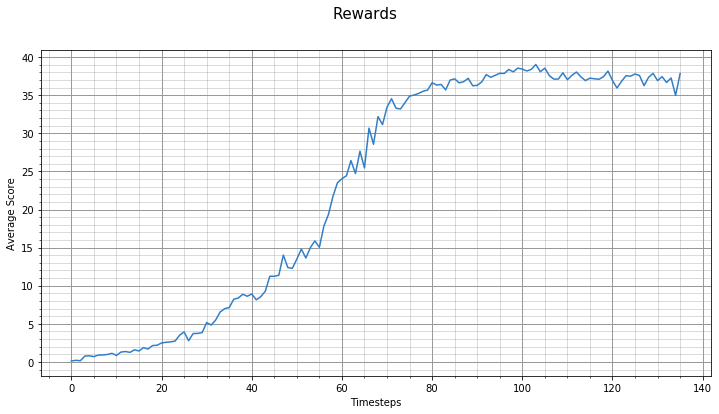

In [7]:
def plot_results(scores):
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle("Rewards", fontsize=15)
    ax.plot(scores, color="#307EC7", label="line")
    ax.set_xlabel("Timesteps")
    ax.set_ylabel("Average Score")
    # GRID
    ax.grid(True)
    ax.grid(b=True, which='major', color='#999999', linestyle='-', linewidth=1)
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.7, linewidth=0.5)
    fig.savefig("learning.jpg")
    
plot_results(results)